In [1]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [37]:
import math
import gillespy2
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_ode_solver import BasicODESolver
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver

In [113]:
class DayModel(gillespy2.Model):
    def __init__(self, parameter_values=None, init_v=0):
        # initialize
        gillespy2.Model.__init__(self, name="Macrophage")
        
        # species
        S_ = gillespy2.Species(name='S_', initial_value=1e6)
        M_ = gillespy2.Species(name='M_', initial_value=1e6)
        H_ = gillespy2.Species(name='H_', initial_value=0)
        
        self.add_species([S_,M_,H_])
        
        # parameters
        k2 = gillespy2.Parameter(name='k2', expression=8e-8)
        k3 = gillespy2.Parameter(name='k3', expression=0)
        Sa = gillespy2.Parameter(name='Sa_', expression=0)
        MuA = gillespy2.Parameter(name='MuA', expression=0)
        ns = gillespy2.Parameter(name='ns', expression=1) # avg = 3.38
        
        self.add_parameter([k2,k3,Sa,ns,MuA])
        
        # reactions
        r1 = gillespy2.Reaction(name='r1', reactants={S_:int(ns.expression),M_:1}, products={H_:1},
                               propensity_function="(k2*S_*M_)/ns")
        
        r2 = gillespy2.Reaction(name='r2', reactants={}, products = {M_:1},
                                rate=Sa)
        
        r3 = gillespy2.Reaction(name='r3', reactants={M_:1}, products = {},
                                rate=MuA)
        
        r4 = gillespy2.Reaction(name='r4', reactants={H_:1}, products = {},
                                rate=k3)
        
        self.add_reaction([r1,r2,r3,r4])
        t = numpy.linspace(0,3600,360)
        self.timespan(t)
        print(t)

In [114]:
model = DayModel()

[   0.           10.02785515   20.05571031   30.08356546   40.11142061
   50.13927577   60.16713092   70.19498607   80.22284123   90.25069638
  100.27855153  110.30640669  120.33426184  130.36211699  140.38997214
  150.4178273   160.44568245  170.4735376   180.50139276  190.52924791
  200.55710306  210.58495822  220.61281337  230.64066852  240.66852368
  250.69637883  260.72423398  270.75208914  280.77994429  290.80779944
  300.8356546   310.86350975  320.8913649   330.91922006  340.94707521
  350.97493036  361.00278552  371.03064067  381.05849582  391.08635097
  401.11420613  411.14206128  421.16991643  431.19777159  441.22562674
  451.25348189  461.28133705  471.3091922   481.33704735  491.36490251
  501.39275766  511.42061281  521.44846797  531.47632312  541.50417827
  551.53203343  561.55988858  571.58774373  581.61559889  591.64345404
  601.67130919  611.69916435  621.7270195   631.75487465  641.78272981
  651.81058496  661.83844011  671.86629526  681.89415042  691.92200557
  701.

In [115]:
%time results = model.run(solver=BasicTauHybridSolver())

CPU times: user 1.3 s, sys: 15.6 ms, total: 1.31 s
Wall time: 1.32 s


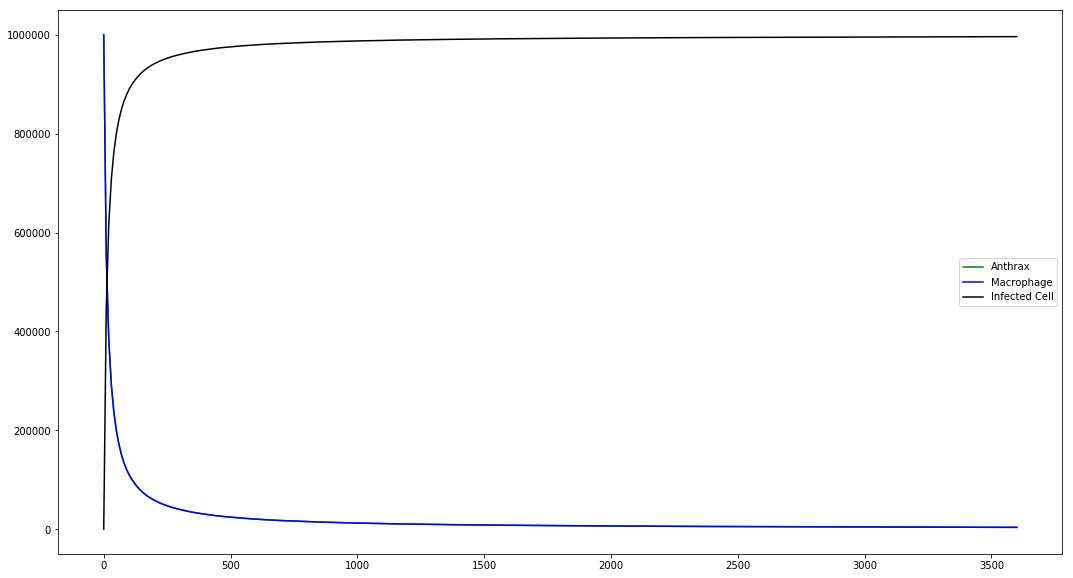

In [116]:
plt.figure(figsize=(18,10))
plt.plot(results['time'], results['S_'], 'g-', label='Anthrax')
plt.plot(results['time'], results['M_'], 'b-', label='Macrophage')
plt.plot(results['time'], results['H_'], 'k-', label='Infected Cell')
plt.legend(loc='best')



In [118]:
print(results['H_'][-1]/results['S_'][0]/int(model.listOfParameters['ns'].expression))

0.996489
